In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d, Axes3D
from tqdm import tqdm

In [2]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, Normalizer, MaxAbsScaler
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline 
import nimfa

### Loading Data 

In [3]:
df_dv=pd.read_csv('/Users/dasha/Documents/Capstone_2_files/Data Cleaning/Clean Data Frame.csv')
df_dv.head()

Title  Achievement/Effort_Importance  \
0        Accountants                           3.63   
1             Actors                           4.73   
2          Actuaries                           4.44   
3     Acupuncturists                           3.65   
4  Acute Care Nurses                           4.25   

   Active Learning_Importance  Active Listening_Importance  \
0                        3.12                         3.88   
1                        2.62                         3.75   
2                        3.38                         4.00   
3                        3.12                         3.75   
4                        3.75                         4.00   

   Adaptability/Flexibility_Importance  \
0                                 3.78   
1                                 4.78   
2                                 3.81   
3                                 3.81   
4                                 4.71   

   Administration and Management_Importance  Analytical Thinking_Importance  \
0                                      3.11                            4.21   
1                                      2.56                            3.25   
2                                      3.31                            4.81   
3                                      2.67                            3.95   
4                                      2.89                            4.11   

   Analyzing Data or Information_Importance  Arm-Hand Steadiness_Importance  \
0                                      3.93                            1.38   
1                                      1.78                            2.00   
2                                      4.88                            1.12   
3                                      3.06                            3.12   
4                                      3.48                            1.75   

   Artistic_Occupational Interests              ...                \
0                             1.00              ...                 
1                             6.67              ...                 
2                             1.67              ...                 
3                             2.33              ...                 
4                             2.00              ...                 

   Work Schedules_Context_3.0  Work With Work Group or Team_Context_1.0  \
0                        0.00                                      16.3   
1                       15.36                                       0.0   
2                        0.00                                       0.0   
3                        0.00                                      13.6   
4                        0.00                                       0.0   

   Work With Work Group or Team_Context_2.0  \
0                                     17.37   
1                                      0.00   
2                                      6.45   
3                                      3.14   
4                                      0.00   

   Work With Work Group or Team_Context_3.0  \
0                                      6.01   
1                                      0.00   
2                                     19.35   
3                                     29.95   
4                                      3.85   

   Work With Work Group or Team_Context_4.0  \
0                                      4.52   
1                                      0.00   
2                                     45.16   
3                                     20.79   
4                                     15.38   

   Work With Work Group or Team_Context_5.0  Wrist-Finger Speed_Importance  \
0                                     55.81                           1.38   
1                                    100.00                           1.12   
2                                     29.03                           1.25   
3                                     32.53                           1.38   
4  

In [4]:
df_dv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Columns: 467 entries, Title to Written Expression_Importance
dtypes: float64(466), object(1)
memory usage: 3.4+ MB


In [5]:
# Check to see if null values are present
assert df_dv.notnull().all().all()

### Scaling data 

In [6]:
array=df_dv.drop(columns='Title').values
st_sc=StandardScaler() 
st_sc_array=st_sc.fit_transform(array)

### Dimensionality Reduction 

Number of components:  466
Number of variable explaining at least 80% of variance:  37


Text(0.5,1,'Cumilative Explained Variance of PCA')

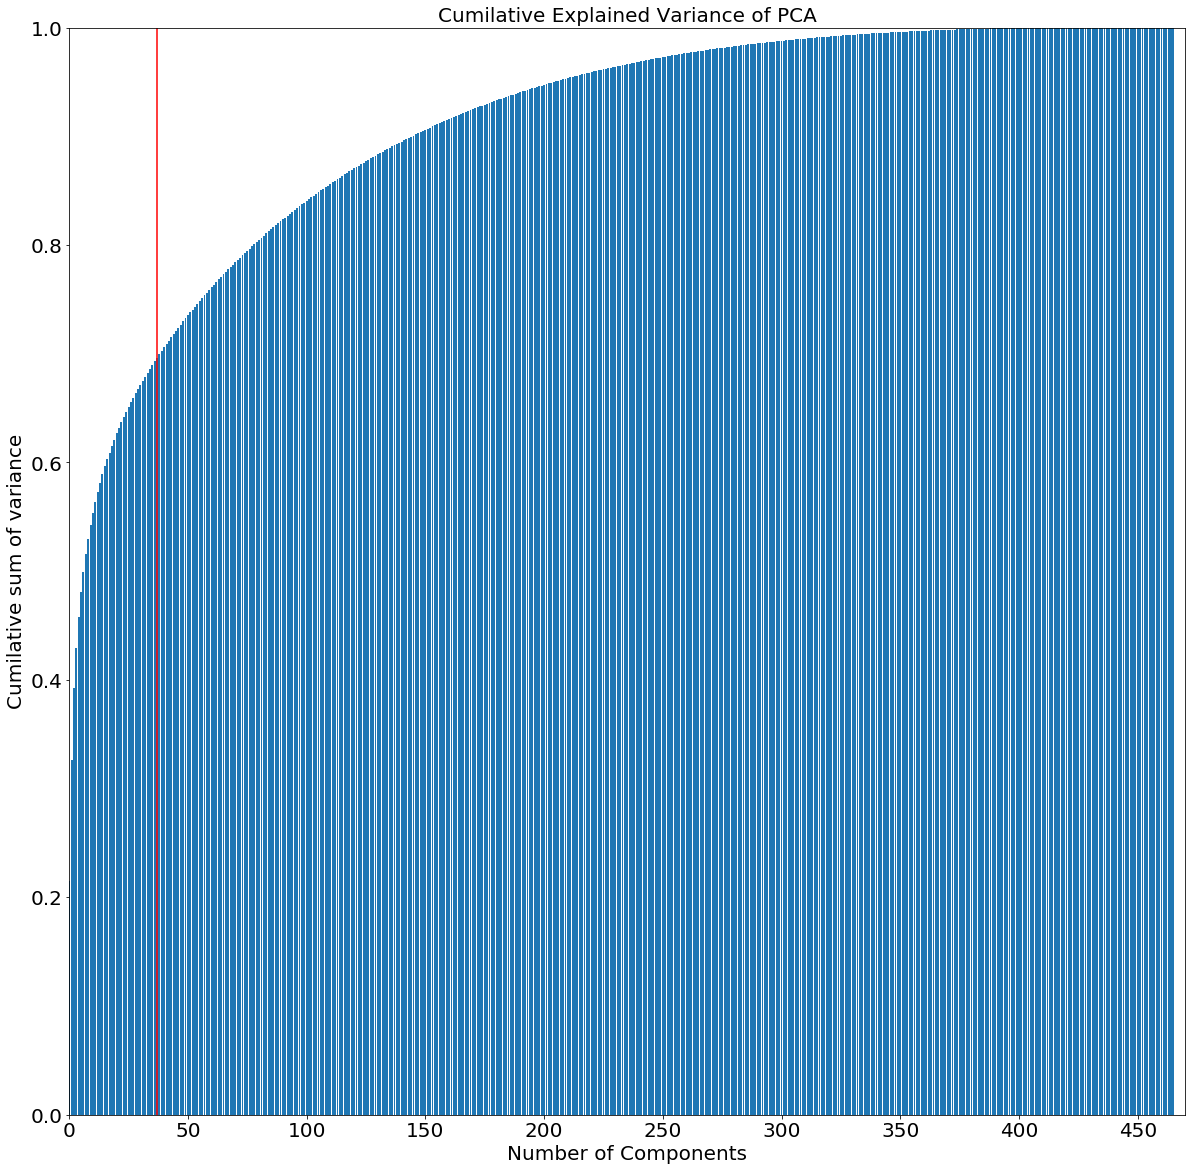

In [7]:
pca=PCA()
model_p=pca.fit(st_sc_array)
n=np.arange(model_p.n_components_)
print('Number of components: ',len(n))
exp_var=model_p.explained_variance_ratio_.cumsum()
exp_var=[round(x,2)for x in exp_var]
print('Number of variable explaining at least 80% of variance: ',exp_var.index(.7)) 
plt.figure(figsize=(20,20))
plt.bar(n,model_p.explained_variance_ratio_.cumsum())
plt.xlim(0,470)
plt.ylim(0,1)
plt.xticks(np.arange(0,470,step=50),fontsize=20)
plt.yticks(fontsize=20)
plt.axvline(37,color='red')
plt.xlabel('Number of Components',fontsize=20)
plt.ylabel('Cumilative sum of variance',fontsize=20)
plt.title('Cumilative Explained Variance of PCA',fontsize=20)

The cut-off point was chosen to be around 40. 

In [8]:
mpca=PCA(n_components=40)
dim_red_array=mpca.fit_transform(st_sc_array)

### KMeans Clustering 

Making the 'Elbow' graph to determine the approximate amount of clusters 

Text(0.5,1,'Elbow Graph for Cluster Selection')

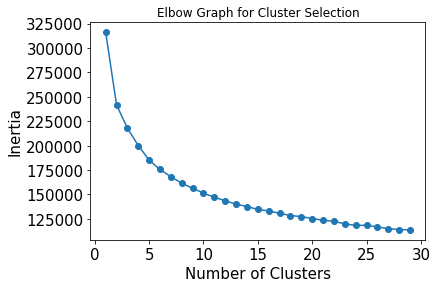

In [9]:
k_range=range(1,30)
inertias=[]
for k in k_range: 
    km=KMeans(n_clusters=k)
    km.fit(dim_red_array)
    inertia=km.inertia_
    inertias.append(inertia)

plt.plot(k_range,inertias,marker='o')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Elbow Graph for Cluster Selection')

Fitting the model and creating the labled table 

In [10]:
km_model=KMeans(n_clusters=6,random_state=42)
km_model.fit(dim_red_array)
km_pred=km_model.labels_

In [11]:
df_km=pd.DataFrame({'Title':df_dv['Title'],'Cluster_ID':km_pred})
df_km.head(10)

Title  Cluster_ID
0                                        Accountants           1
1                                             Actors           2
2                                          Actuaries           1
3                                     Acupuncturists           4
4                                  Acute Care Nurses           4
5             Adapted Physical Education Specialists           4
6     Adhesive Bonding Machine Operators and Tenders           3
7  Administrative Law Judges, Adjudicators, and H...           1
8                   Administrative Services Managers           4
9  Adult Basic and Secondary Education and Litera...           1

3D visualization of the clusters 

Text(0.5,1,'TSNE - KMeans')

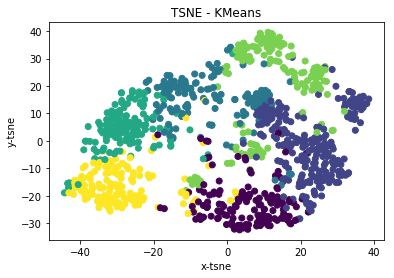

In [12]:
tsne=TSNE(learning_rate=150)
tsne_feat=tsne.fit_transform(dim_red_array)
xs = tsne_feat[:,0]
ys = tsne_feat[:,1]
plt.scatter(xs,ys,c=km_pred)
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title('TSNE - KMeans')

### Hierarchial Clustering 

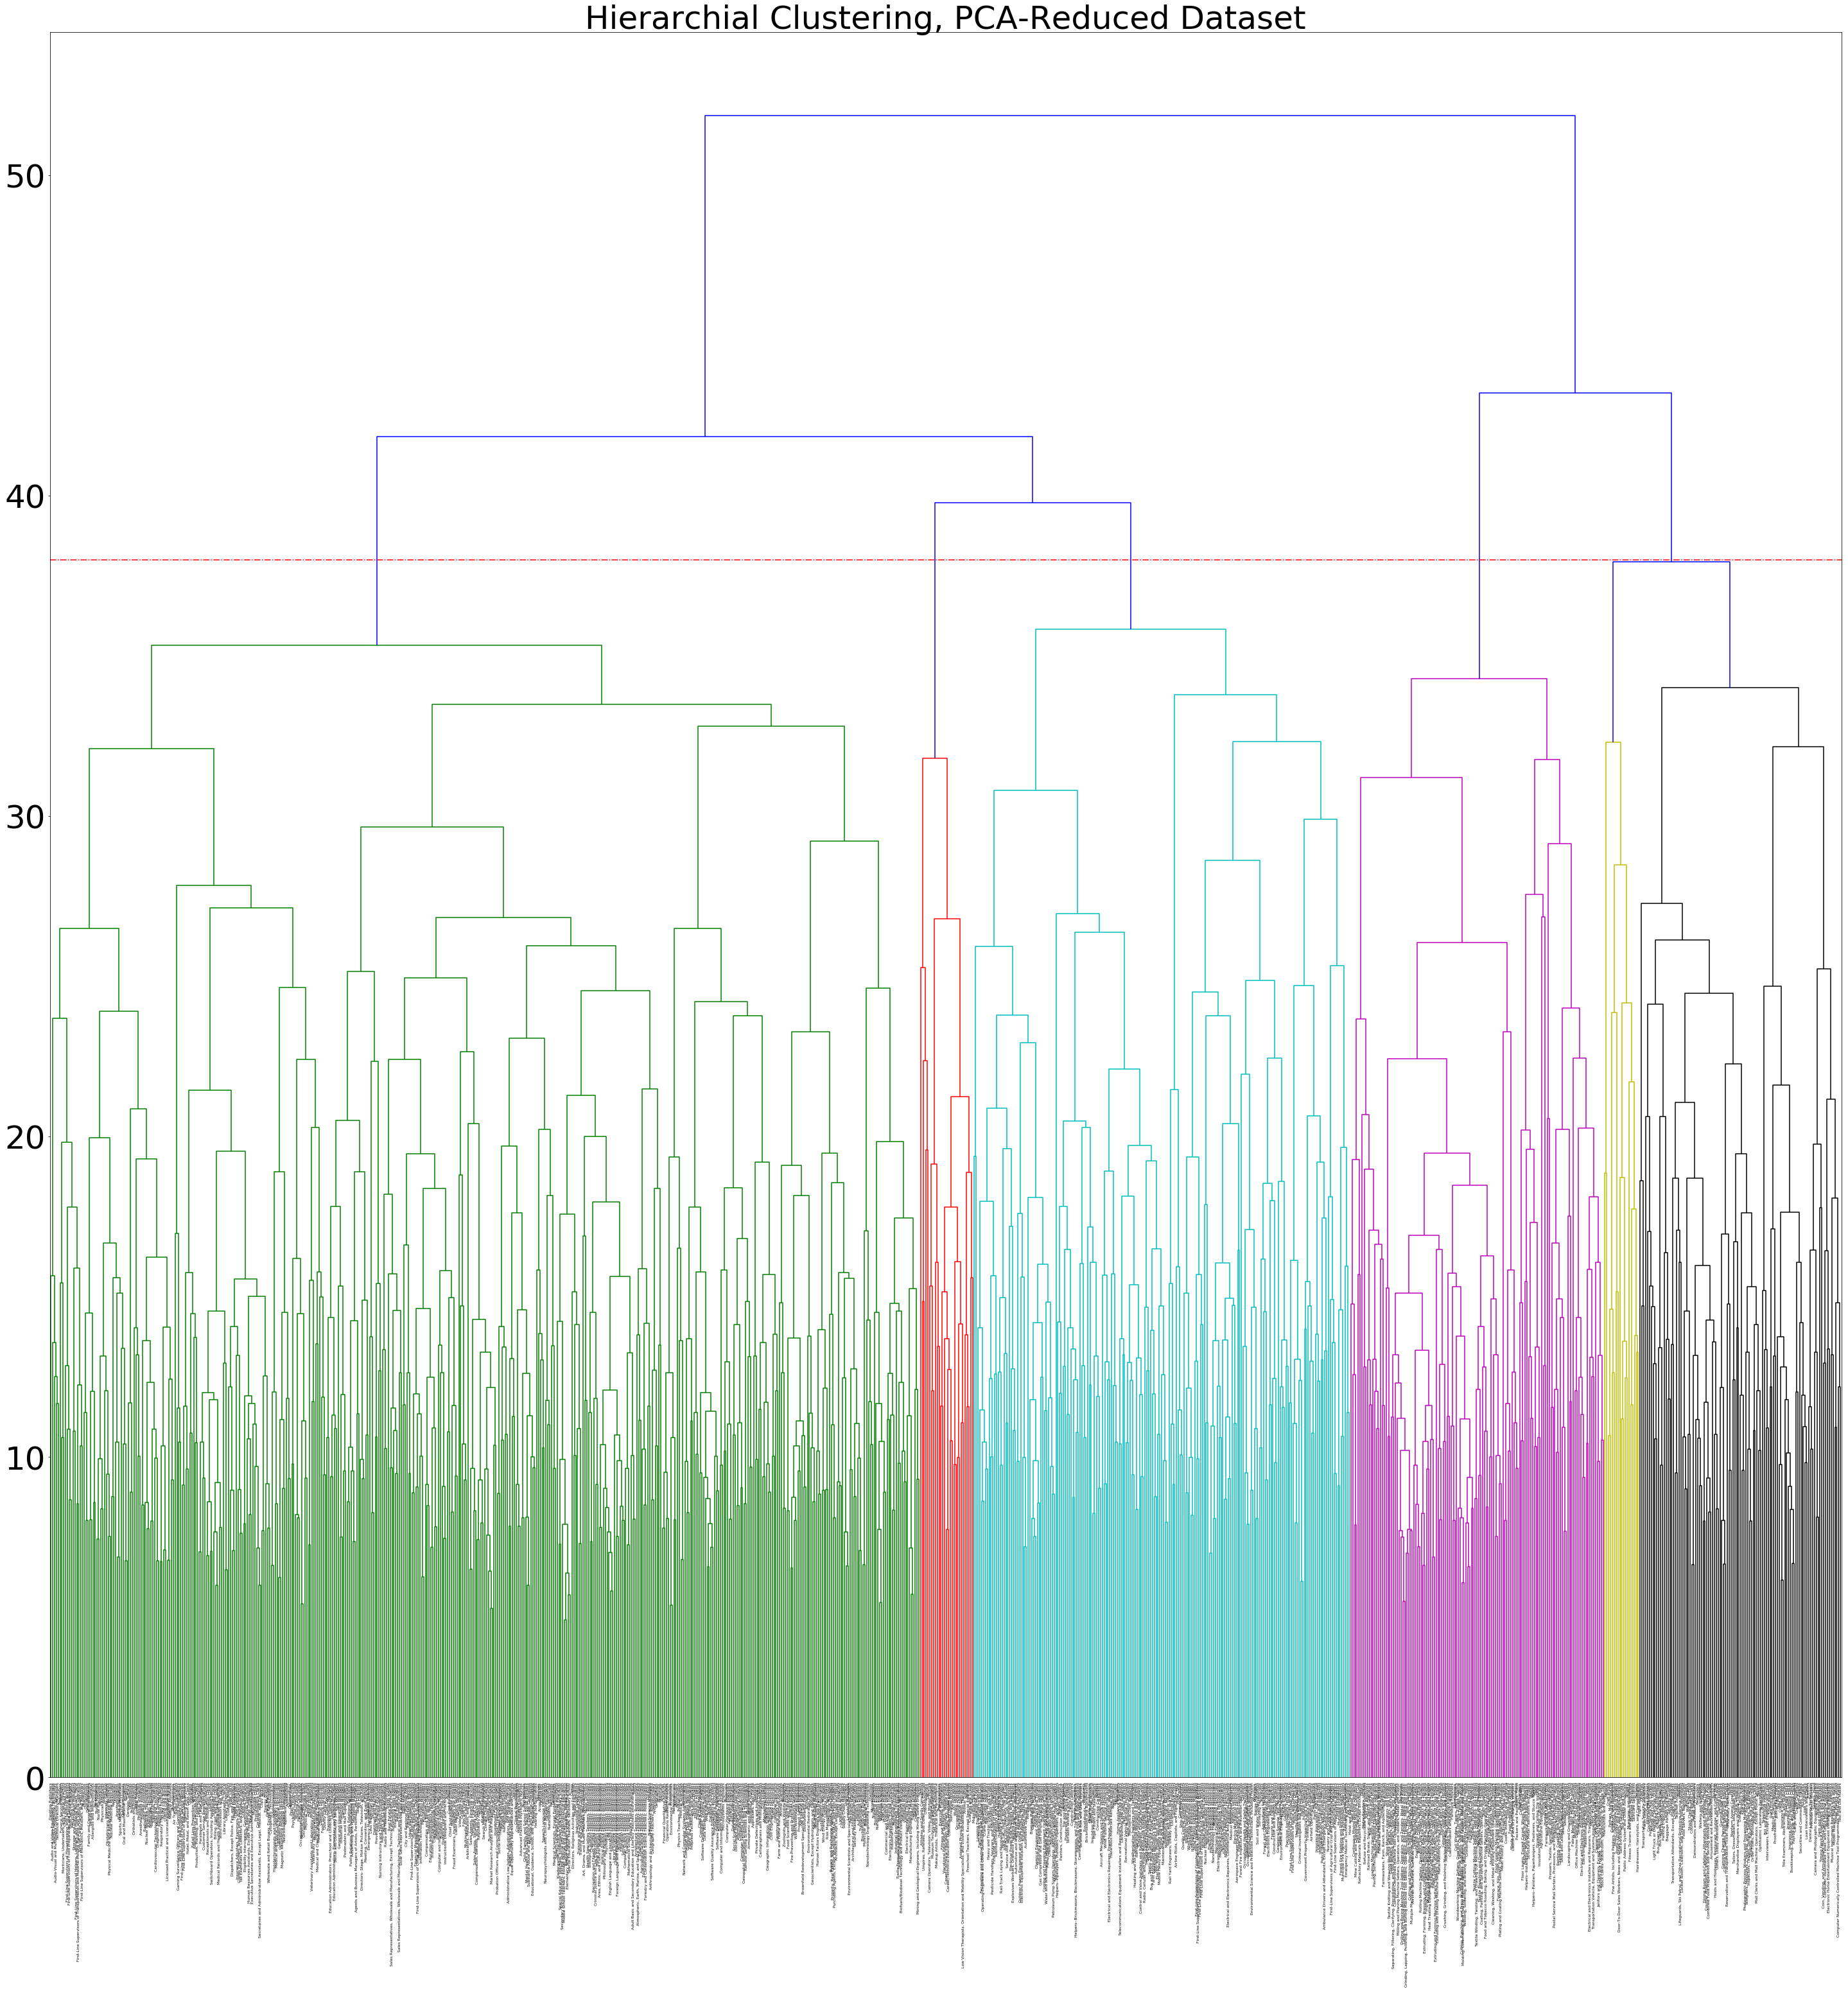

In [13]:
merge = linkage(dim_red_array,method='complete')
figure=plt.figure(figsize=(50,50)) 
dendrogram(merge,labels=list(df_dv['Title']),leaf_rotation=90,leaf_font_size=6)
plt.yticks(fontsize=50)
plt.axhline(38,color='red',linestyle='-.')
plt.title('Hierarchial Clustering, PCA-Reduced Dataset',fontsize=50)
plt.show()

In [14]:
ag_model=AgglomerativeClustering(n_clusters=6)
ag_model.fit(dim_red_array)
ag_pred=ag_model.labels_
df_ag=pd.DataFrame({'Title':df_dv['Title'],'Cluster_ID':ag_pred})
df_ag.head(15)

Title  Cluster_ID
0                                         Accountants           1
1                                              Actors           2
2                                           Actuaries           1
3                                      Acupuncturists           4
4                                   Acute Care Nurses           4
5              Adapted Physical Education Specialists           4
6      Adhesive Bonding Machine Operators and Tenders           5
7   Administrative Law Judges, Adjudicators, and H...           4
8                    Administrative Services Managers           4
9   Adult Basic and Secondary Education and Litera...           2
10               Advanced Practice Psychiatric Nurses           4
11                           Advertising Sales Agents           1
12                Advertising and Promotions Managers           1
13   Aerospace Engineering and Operations Technicians           0
14                                Aerospace Engineers           0

Text(0.5,1,'TSNE - Agglomerative Clustering, Post-PCA')

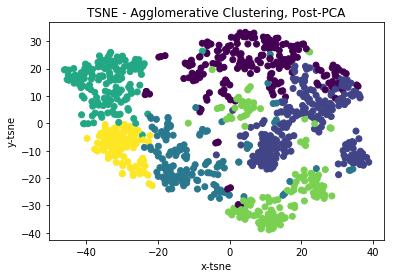

In [15]:
tsne=TSNE(learning_rate=200)
tsne_feat=tsne.fit_transform(dim_red_array)
xs = tsne_feat[:,0]
ys = tsne_feat[:,1]
plt.scatter(xs,ys,c=ag_pred)
plt.ylabel('y-tsne')
plt.xlabel('x-tsne')
plt.title('TSNE - Agglomerative Clustering, Post-PCA')

### NMF 

In [16]:
max_abs=MaxAbsScaler()
max_array=max_abs.fit_transform(array)
components=range(10,len(df_dv.columns),10)

In [17]:
nmf=nimfa.Nmf(max_array)
nmf_fit=nmf()
est_rank=nmf.estimate_rank(rank_range=components)

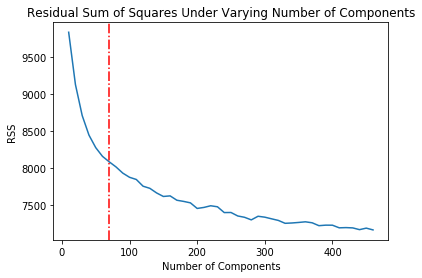

In [18]:
est_rss=[]
for rank in est_rank.keys(): 
    est_rss.append(est_rank[rank]['rss'])
plt.plot(components,est_rss)
plt.xlabel('Number of Components')
plt.ylabel('RSS')
plt.title('Residual Sum of Squares Under Varying Number of Components')
plt.axvline(70,linestyle='-.',color='red')

In [19]:
n_components=50
model_nmf=NMF(n_components=n_components,random_state=42)
w=model_nmf.fit_transform(max_array)
h=model_nmf.components_

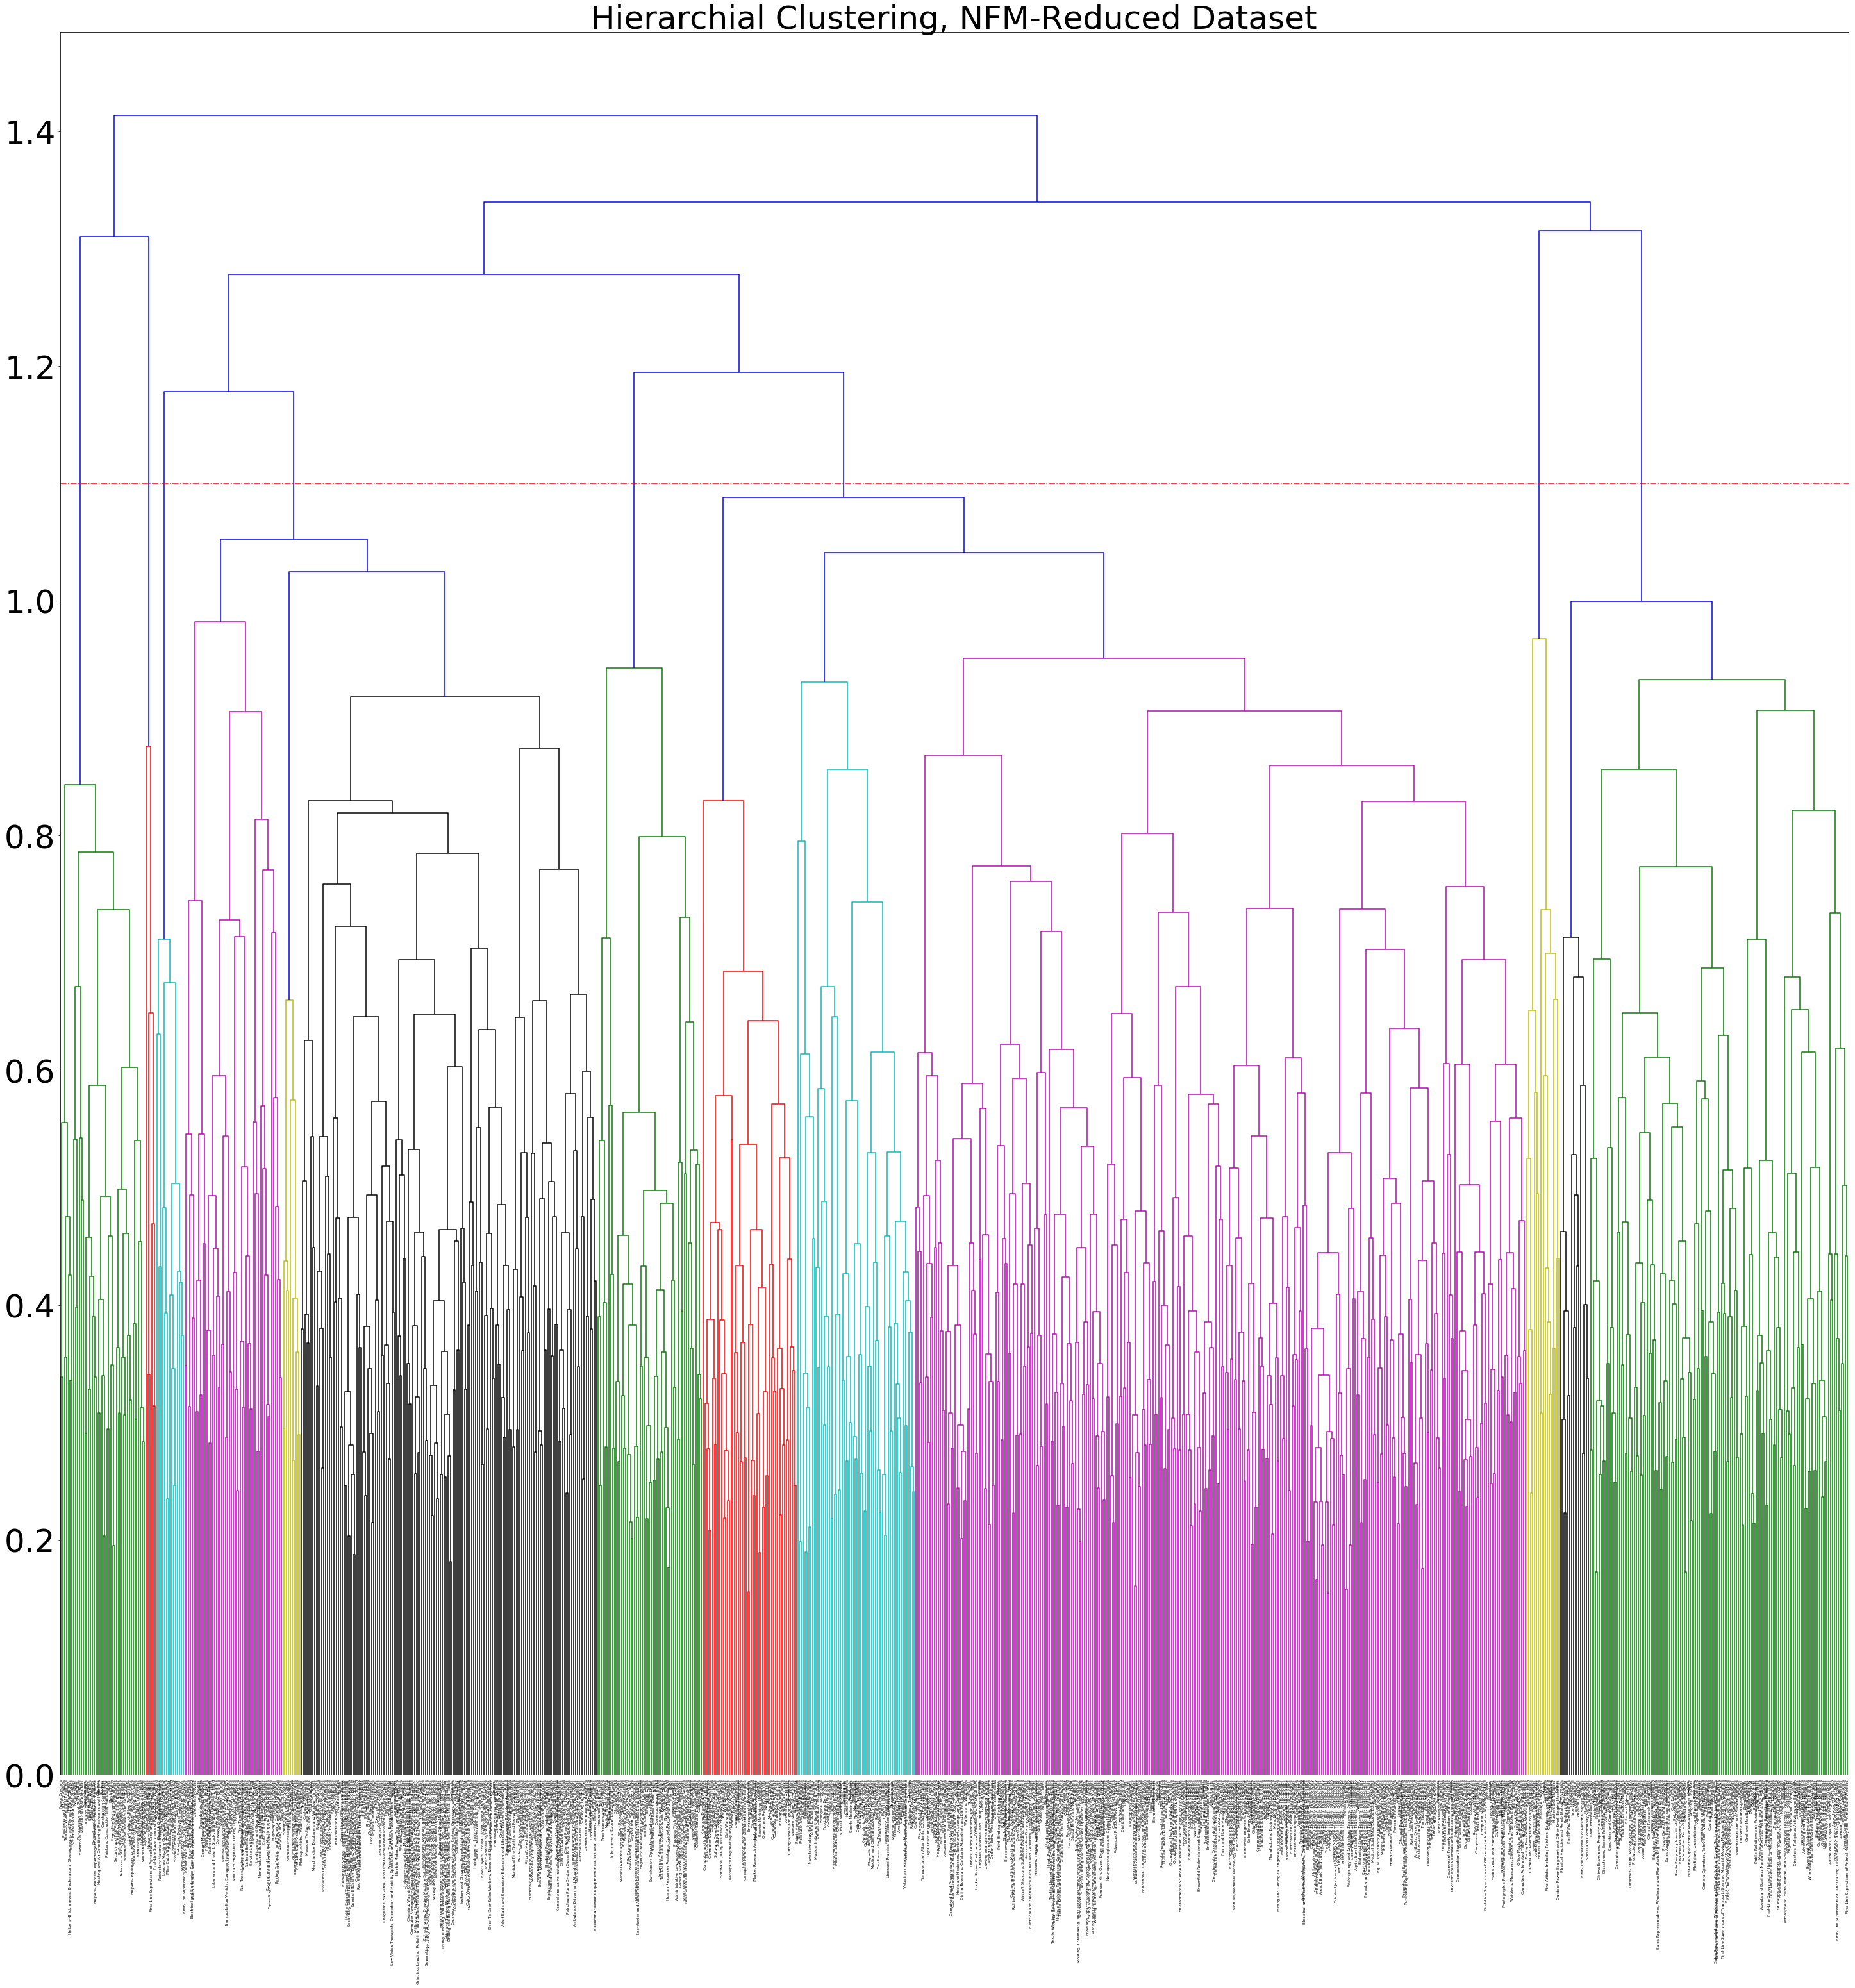

In [20]:
merge_nmf = linkage(w,method='complete')
figure=plt.figure(figsize=(50,50)) 
dendrogram(merge_nmf,labels=list(df_dv['Title']),leaf_rotation=90,leaf_font_size=6)
plt.yticks(fontsize=50)
plt.axhline(1.1,linestyle='-.',color='red')
plt.axhline(38.5,color='red',linestyle='-.')
plt.title('Hierarchial Clustering, NFM-Reduced Dataset',fontsize=50)
plt.show()


In [21]:
ag_model_nmf=AgglomerativeClustering(n_clusters=8)
ag_model_nmf.fit(w)
ag_pred_nmf=ag_model_nmf.labels_
df_ag_nmf=pd.DataFrame(data=w,index=df_dv['Title'])
df_ag_nmf['Cluster_ID']=ag_pred_nmf
df_ag_nmf.head(30)

0         1  \
Title                                                                    
Accountants                                         0.237870  0.033923   
Actors                                              0.131892  0.000000   
Actuaries                                           0.282262  0.000000   
Acupuncturists                                      0.171650  0.000000   
Acute Care Nurses                                   0.279746  0.000000   
Adapted Physical Education Specialists              0.204116  0.000000   
Adhesive Bonding Machine Operators and Tenders      0.162959  0.134249   
Administrative Law Judges, Adjudicators, and He...  0.260184  0.000000   
Administrative Services Managers                    0.230195  0.047689   
Adult Basic and Secondary Education and Literac...  0.197795  0.000000   
Advanced Practice Psychiatric Nurses                0.271320  0.002103   
Advertising Sales Agents                            0.209383  0.000000   
Advertising and Promotions Managers                 0.223804  0.000000   
Aerospace Engineering and Operations Technicians    0.205476  0.177085   
Aerospace Engineers                                 0.274706  0.031022   
Agents and Business Managers of Artists, Perfor...  0.223334  0.035202   
Agricultural Engineers                              0.242605  0.000000   
Agricultural Equipment Operators                    0.000000  0.282960   
Agricultural Inspectors                             0.231292  0.000000   
Agricultural Sciences Teachers, Postsecondary       0.204844  0.062918   
Agricultural Technicians                            0.210027  0.018629   
Air Traffic Controllers                             0.242861  0.000000   
Aircraft Cargo Handling Supervisors                 0.218743  0.055797   
Aircraft Mechanics and Service Technicians          0.210295  0.073170   
Aircraft Structure, Surfaces, Rigging, and Syst...  0.170334  0.106312   
Airfield Operations Specialists                     0.223190  0.000000   
Airline Pilots, Copilots, and Flight Engineers      0.194827  0.000000   
Allergists and Immunologists                        0.288908  0.000000   
Ambulance Drivers and Attendants, Except Emerge...  0.170446  0.015764   
Amusement and Recreation Attendants                 0.129645  0.000000   

                                                           2         3  \
Title                                                                    
Accountants                                         0.000000  0.000000   
Actors                                              0.000000  0.000000   
Actuaries                                           0.000000  0.000000   
Acupuncturists                                      0.031899  0.172203   
Acute Care Nurses                                   0.000000  0.248374   
Adapted Physical Education Specialists              0.000000  0.031702   
Adhesive Bonding Machine Operators and Tenders      0.037879  0.008109   
Administrative Law Judges, Adjudicators, and He...  0.005548  0.000000   
Administrative Services Managers                    0.044200  0.000000   
Adult Basic and Secondary Education and Literac...  0.000000  0.000000   
Advanced Practice Psychiatric Nurses                0.020268  0.072277   
Advertising Sales Agents                            0.021910  0.000000   
Advertising and Promotions Managers                 0.004095  0.000000   
Aerospace Engineering and Operations Technicians    0.000000  0.015462   
Aerospace Engineers                                 0.002534  0.000000   
Agents and Business Managers of Artists, Perfor...  0.022389  0.011753   
Agricultural Engineers                              0.004493  0.000000   
Agricultural Equipment Operators                    0.014244  0.000000   
Agricultural Inspectors                             0.073768  0.007783   
Agricultural Sciences Teachers, Postsecondary       0.046695  0.000000   
Agricultural Technicians                            0.009316  

Text(0.5,1,'Agglomerative Clustering, Post-NMF ')

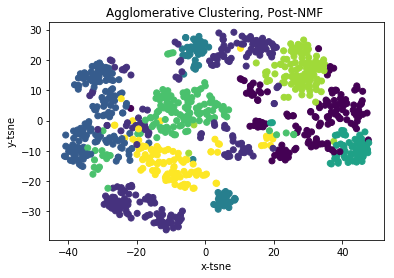

In [22]:
tsne=TSNE(learning_rate=300)
tsne_feat=tsne.fit_transform(w)
xs = tsne_feat[:,0]
ys = tsne_feat[:,1]
plt.scatter(xs,ys,c=ag_pred_nmf)
plt.ylabel('y-tsne')
plt.xlabel('x-tsne')
plt.title('Agglomerative Clustering, Post-NMF ')

In [23]:
df_ag_nmf.reset_index(inplace=True)
w_nmf_mat=df_ag_nmf.drop('Title',axis=1)
grouped_mat=w_nmf_mat.groupby('Cluster_ID').mean()
grouped_mat.head()

0         1         2         3         4         5   \
Cluster_ID                                                               
0           0.126881  0.141262  0.019012  0.012484  0.021387  0.027653   
1           0.199867  0.025546  0.033132  0.033281  0.035242  0.082299   
2           0.223866  0.025385  0.016328  0.008240  0.014002  0.012686   
3           0.238468  0.015607  0.025326  0.223912  0.219196  0.027616   
4           0.145761  0.117132  0.006094  0.020781  0.002294  0.007958   

                  6         7         8         9     ...           40  \
Cluster_ID                                            ...                
0           0.018805  0.049232  0.085621  0.018550    ...     0.022213   
1           0.050366  0.020054  0.014341  0.028233    ...     0.064145   
2           0.031534  0.017364  0.008883  0.032762    ...     0.026912   
3           0.017441  0.045236  0.026366  0.005766    ...     0.045347   
4           0.005877  0.077558  0.035904  0.021982    ...     0.018102   

                  41        42        43        44        45        46  \
Cluster_ID                                                               
0           0.125972  0.034607  0.061366  0.060889  0.040245  0.042895   
1           0.085610  0.076906  0.036510  0.077157  0.067632  0.037014   
2           0.148176  0.062094  0.079514  0.058899  0.036407  0.002835   
3           0.299223  0.116824  0.042520  0.074499  0.150999  0.033030   
4           0.145815  0.046362  0.072484  0.154986  0.048926  0.095237   

                  47        48        49  
Cluster_ID                                
0           0.180760  0.025850  0.035980  
1           0.009128  0.028218  0.031765  
2           0.005850  0.248800  0.031735  
3           0.028792  0.020360  0.002552  
4           0.109774  0.001410  0.006295  

[5 rows x 50 columns]

Text(0.5,1,'Cluster ID vs. Components')

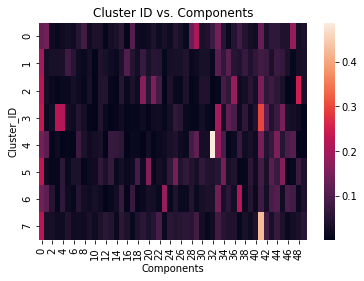

In [24]:
sns.heatmap(grouped_mat)
plt.xlabel('Components')
plt.title('Cluster ID vs. Components')

In [45]:
trans_grouped=grouped_mat.T
major_components=[]
for column in trans_grouped.columns: 
    sel_comp=trans_grouped.index[trans_grouped[column]>.15].tolist()
    for comp in sel_comp: 
        if comp not in major_components: 
            major_components.append(comp)

Text(0.5,-27.5,'Components')

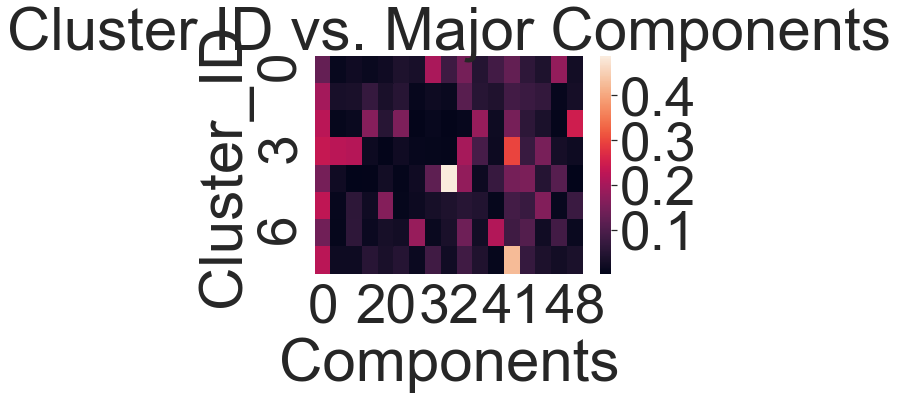

In [46]:
mc=sorted(major_components)
sns.heatmap(grouped_mat.loc[:,mc])
plt.title('Cluster ID vs. Major Components')
plt.xlabel('Components')

In [27]:
grouped_mat_df=grouped_mat.loc[:,mc]
grouped_mat_df.to_csv('/Users/dasha/Documents/NMF_comp_df.csv')

In [28]:
df_h=pd.DataFrame(data=h,columns=df_dv.columns[1:])
df_h.head()

Achievement/Effort_Importance  Active Learning_Importance  \
0                       1.821577                    2.428435   
1                       0.248559                    0.551271   
2                       0.672987                    0.016977   
3                       0.342332                    0.060781   
4                       0.351765                    0.234984   

   Active Listening_Importance  Adaptability/Flexibility_Importance  \
0                     2.038812                             1.732425   
1                     0.315775                             0.247610   
2                     0.326040                             0.689891   
3                     0.170234                             0.335615   
4                     0.238536                             0.212331   

   Administration and Management_Importance  Analytical Thinking_Importance  \
0                                  0.473558                        2.122799   
1                                  0.145192                        0.216676   
2                                  1.454533                        0.501882   
3                                  0.362504                        0.322459   
4                                  0.067386                        0.240337   

   Analyzing Data or Information_Importance  Arm-Hand Steadiness_Importance  \
0                                  2.313608                        0.000000   
1                                  0.782425                        0.727128   
2                                  0.258246                        1.409252   
3                                  0.254087                        0.773542   
4                                  0.000000                        0.632228   

   Artistic_Occupational Interests  \
0                         0.000000   
1                         0.000000   
2                         0.000000   
3                         0.074397   
4                         0.026486   

   Assisting and Caring for Others_Importance              ...                \
0                                    0.077005              ...                 
1                                    0.707424              ...                 
2                                    1.280259              ...                 
3                                    1.902795              ...                 
4                                    0.109256              ...                 

   Work Schedules_Context_3.0  Work With Work Group or Team_Context_1.0  \
0                         0.0                                       0.0   
1                         0.0                                       0.0   
2                         0.0                                       0.0   
3                         0.0                                       0.0   
4                         0.0                                       0.0   

   Work With Work Group or Team_Context_2.0  \
0                                  0.000000   
1                                  0.008718   
2                                  0.000000   
3                                  0.000000   
4                                  0.000000   

   Work With Work Group or Team_Context_3.0  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Work With Work Group or Team_Context_4.0  \
0                                  0.000000   
1                                  0.000000   
2                                  0.000000   
3                                  0.000000   
4                                  0.010809   

   Work With Work Group or Team_Context_5.0  Wrist-Finger Speed_Importance  \
0                                  0.000000                       0.000000   
1                                  0.101777                       0.662707 

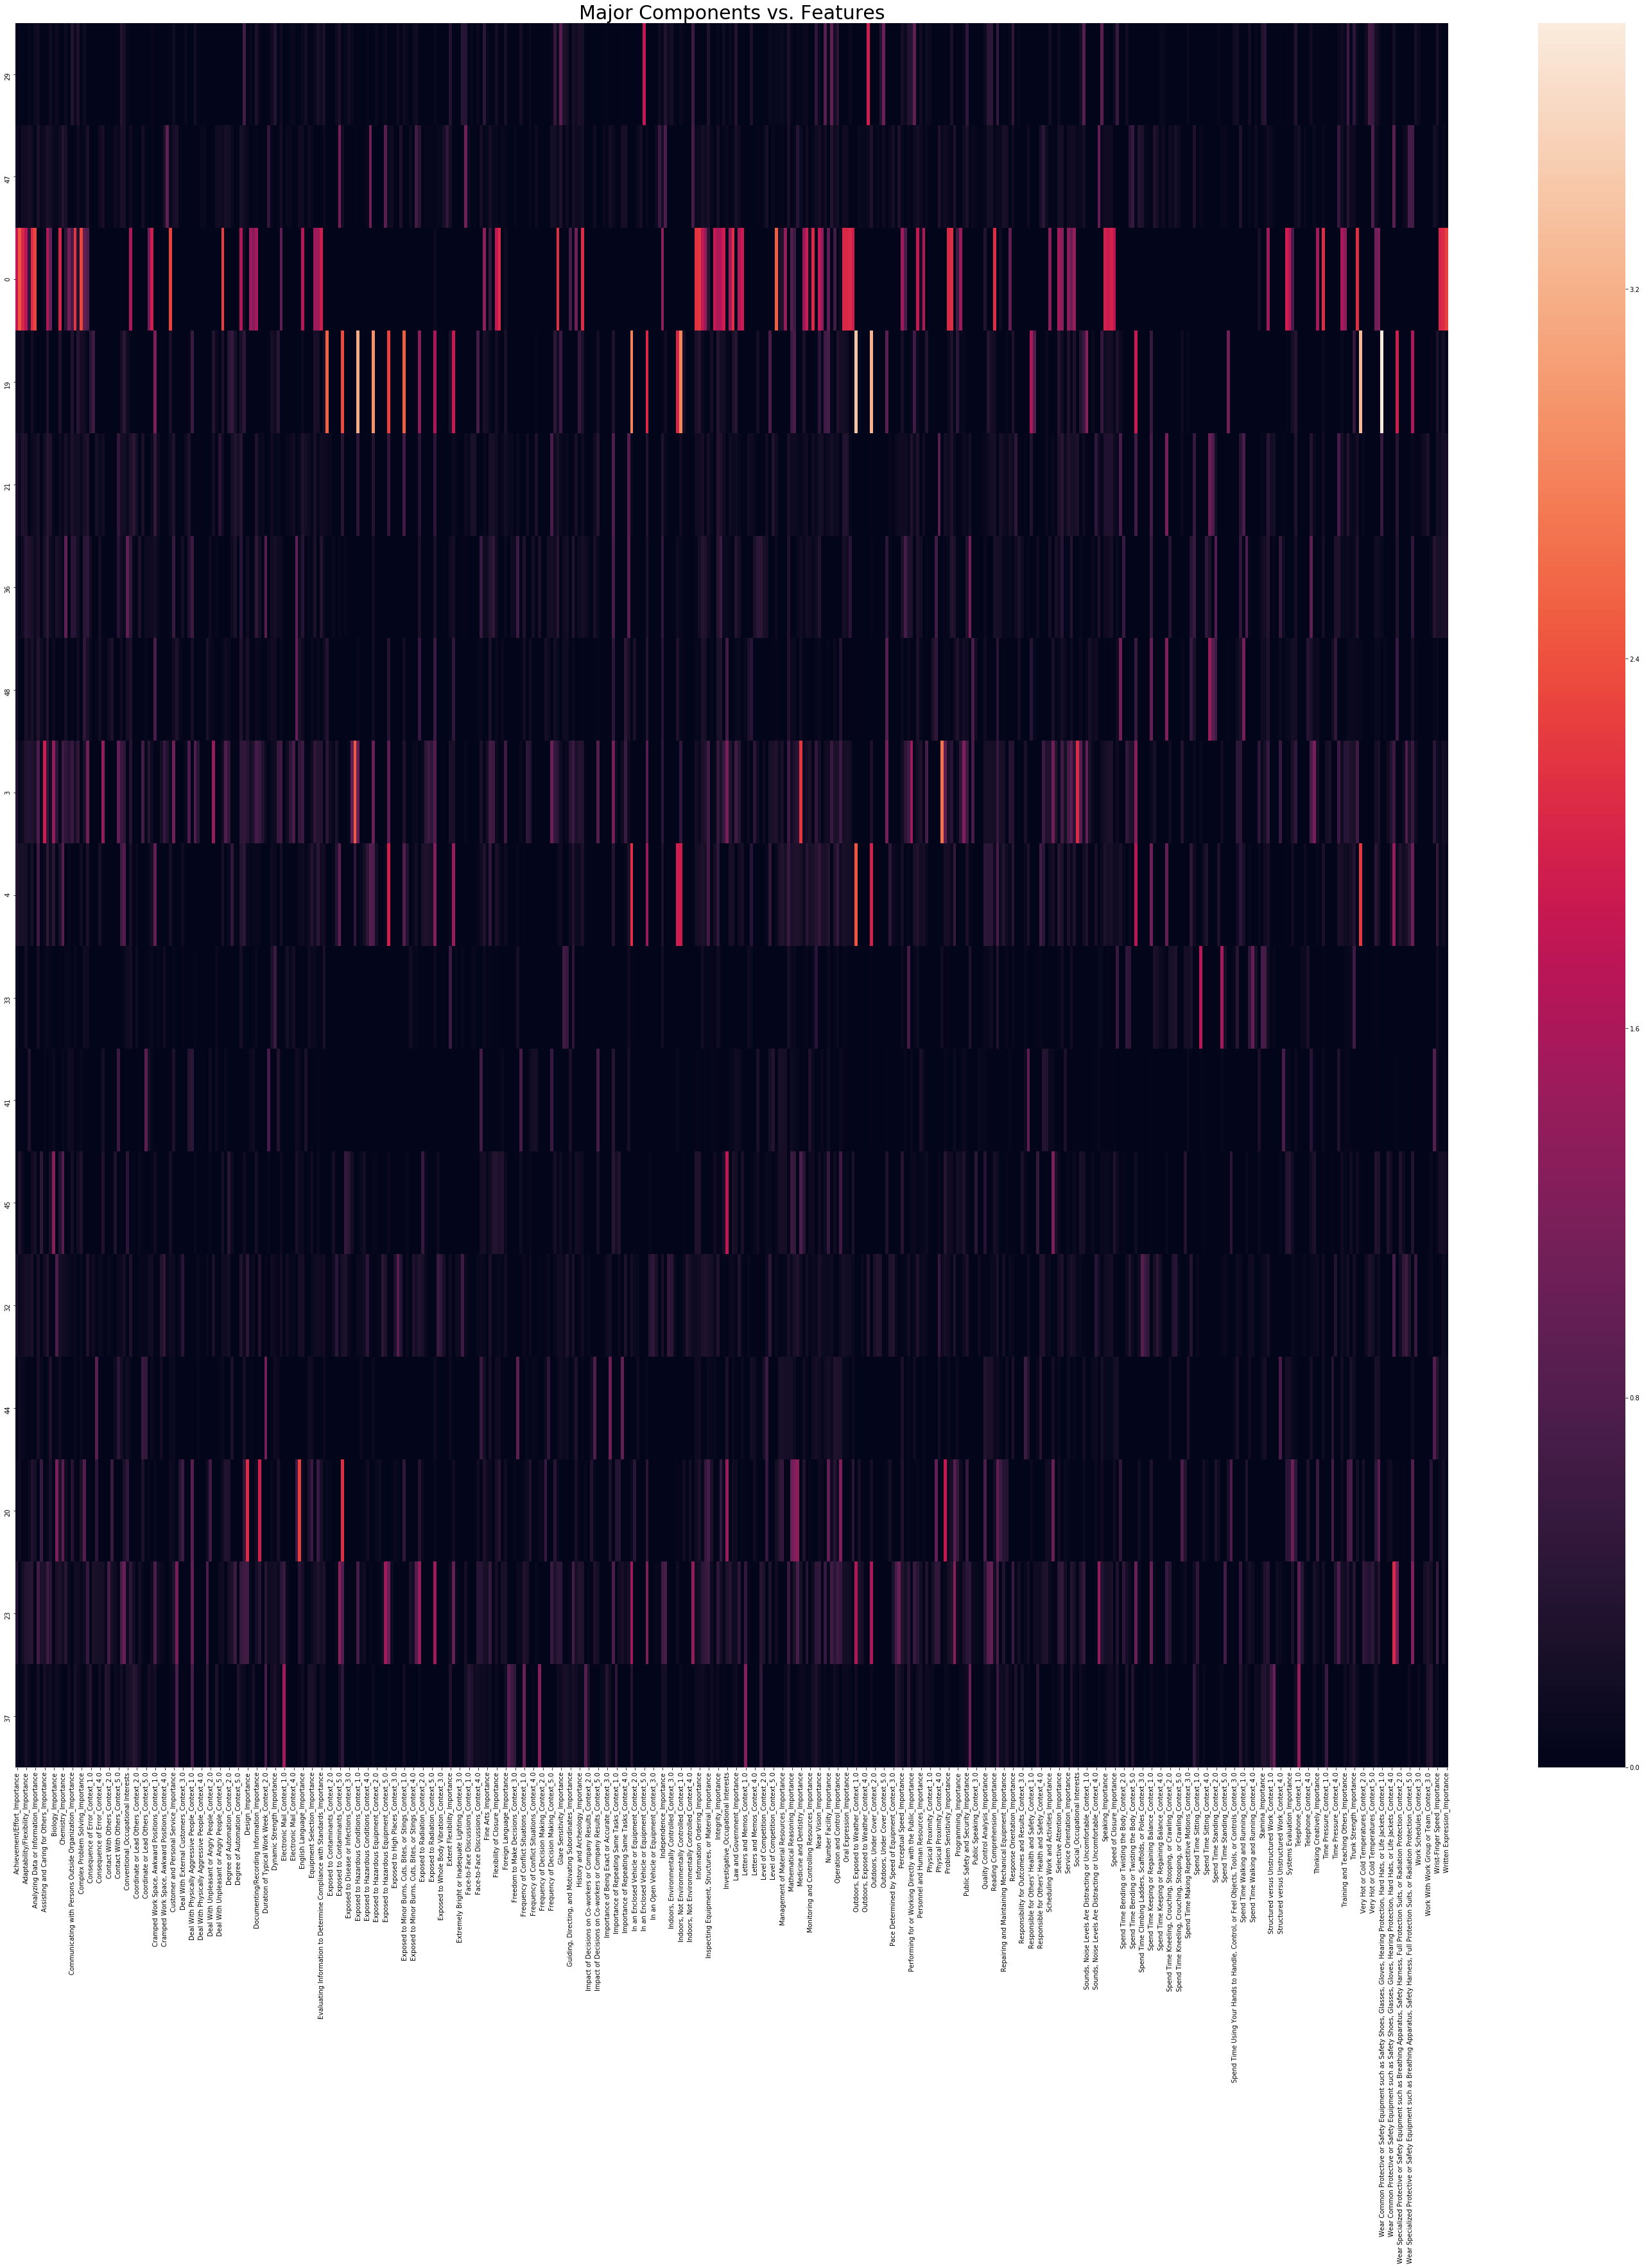

In [29]:
plt.figure(figsize=(50,50))
plt.xlabel('Features',fontsize=30)
plt.title('Major Components vs. Features',fontsize=30)
plt.ylabel('Major Components',fontsize=30)
sns.heatmap(df_h.loc[major_components,:])


In [30]:
df_h_narrow=df_h.loc[major_components,:]
df_h_narrow_T=df_h_narrow.T
df_h_narrow_T.head()

29        47        0   \
Achievement/Effort_Importance             0.000000  0.170496  1.821577   
Active Learning_Importance                0.034118  0.032359  2.428435   
Active Listening_Importance               0.000000  0.141037  2.038812   
Adaptability/Flexibility_Importance       0.000000  0.156938  1.732425   
Administration and Management_Importance  0.071729  0.214104  0.473558   

                                                19        21        36  \
Achievement/Effort_Importance             0.147138  0.318945  0.240090   
Active Learning_Importance                0.112642  0.122709  0.039638   
Active Listening_Importance               0.209307  0.312051  0.167290   
Adaptability/Flexibility_Importance       0.000000  0.255697  0.382357   
Administration and Management_Importance  0.000000  0.000000  0.317622   

                                                48        3         4   \
Achievement/Effort_Importance             0.238559  0.342332  0.351765   
Active Learning_Importance                0.000000  0.060781  0.234984   
Active Listening_Importance               0.009901  0.170234  0.238536   
Adaptability/Flexibility_Importance       0.258062  0.335615  0.212331   
Administration and Management_Importance  0.141882  0.362504  0.067386   

                                                33        41        45  \
Achievement/Effort_Importance             0.098260  0.003822  0.000000   
Active Learning_Importance                0.000000  0.037025  0.304113   
Active Listening_Importance               0.008860  0.036146  0.113462   
Adaptability/Flexibility_Importance       0.187634  0.000000  0.000000   
Administration and Management_Importance  0.000000  0.304491  0.000000   

                                                32        44        20  \
Achievement/Effort_Importance             0.272748  0.000000  0.096881   
Active Learning_Importance                0.107855  0.120689  0.120732   
Active Listening_Importance               0.156965  0.073797  0.023449   
Adaptability/Flexibility_Importance       0.218813  0.047344  0.021542   
Administration and Management_Importance  0.180219  0.014288  0.101582   

                                                23        37  
Achievement/Effort_Importance             0.375886  0.133173  
Active Learning_Importance                0.012606  0.004521  
Active Listening_Importance               0.205500  0.068474  
Adaptability/Flexibility_Importance       0.352831  0.216005  
Administration and Management_Importance  0.369093  0.117219

In [48]:
major_features=[]
for column in df_h_narrow_T.columns: 
    sel_feat=df_h_narrow_T.index[df_h_narrow_T[column]>.8].tolist()
    for feat in sel_feat: 
        if feat not in major_features: 
            major_features.append(feat)

In [33]:
sns.set(font_scale=5)
plt.figure(figsize=(209,100))
sns.heatmap(df_h_narrow.loc[:,major_features])
plt.title('Major Components vs. Major Features')
plt.xlabel('Major Features',fontsize=100)
plt.ylabel('Major Components',fontsize=100)

Text(1817.5,0.5,'Major Components')

In [49]:
major_features_list=major_features.append('Title')
df_major_features=df_dv.loc[:,major_features]
df_major_features['Cluster_ID']=ag_pred_nmf
df_major_features.head()

Glare Sensitivity_Importance  \
0                          1.00   
1                          1.88   
2                          1.00   
3                          1.00   
4                          1.00   

   In an Enclosed Vehicle or Equipment_Context_5.0  Night Vision_Importance  \
0                                            16.26                      1.0   
1                                             2.15                      1.0   
2                                             0.00                      1.0   
3                                             0.00                      1.0   
4                                             3.70                      1.0   

   Operating Vehicles, Mechanized Devices, or Equipment_Importance  \
0                                               1.18                 
1                                               1.30                 
2                                               1.06                 
3                                               1.40                 
4                                               2.00                 

   Outdoors, Exposed to Weather_Context_5.0  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Outdoors, Under Cover_Context_5.0  Peripheral Vision_Importance  \
0                                0.0                           1.0   
1                                0.0                           1.0   
2                                0.0                           1.0   
3                                0.0                           1.0   
4                                0.0                           1.0   

   Sound Localization_Importance  Spatial Orientation_Importance  \
0                            1.0                            1.00   
1                            1.0                            1.00   
2                            1.0                            1.00   
3                            1.0                            1.25   
4                            1.0                            1.00   

   Cramped Work Space, Awkward Positions_Context_5.0     ...      \
0                                               0.00     ...       
1                                               0.00     ...       
2                                               0.00     ...       
3                                               0.00     ...       
4                                              14.81     ...       

   Telephone_Context_1.0  Electronic Mail_Context_1.0  \
0                   0.00                         0.25   
1                   2.77                         2.74   
2                   0.00                         0.00   
3                   0.00                         5.46   
4                   0.00                         0.00   

   Freedom to Make Decisions_Context_1.0  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Frequency of Conflict Situations_Context_1.0  \
0                                         34.47   
1                                         17.80   
2                                         15.62   
3                                         20.39   
4                                          0.00   

   Frequency of Decision Making_Context_1.0  \
0                                      6.47   
1                                      3.81   
2                                      0.00   
3                                      6.94   
4                                      0.00   

   Impact of Decisions on Co-workers or Company Results_Context_1.0  \
0                                               1.09                  
1                                 